# ML Project - Bank Marketing Prediction



In [2]:
#  Importing the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [3]:
# Reading the data set.
df = pd.read_csv(r"C:\Users\Aniket Sawant\Desktop\Board Infinity\ML\Bank-Marketing-Prediction 2\bank-marketing.csv") 
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Describe the pdays column, make note of the mean, median and minimum values. 

In [7]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [8]:
print("Mean value is", df['pdays'].mean())
print("Median value is", df['pdays'].median())
print("Min value is", df['pdays'].min())

Mean value is 40.19782796222158
Median value is -1.0
Min value is -1


**"pdays" column signifies days passed.
If value is -1 i.e. It is an outlier because no. of days passed can't be negative.**

### Describing the pdays column again, excluding certain calues. 

In [9]:
print("Mean of pdays column after excluding -1 values is", df[df['pdays'] != -1]['pdays'].mean() )
print("Median of pdays column after excluding -1 values is", df[df['pdays'] != -1]['pdays'].median() )

Mean of pdays column after excluding -1 values is 224.57769165556496
Median of pdays column after excluding -1 values is 194.0


__After skipping the outlier -1 mean and median values are changed .__

### Ploting a horizontal bar graph with the median values of balance for each education level. 

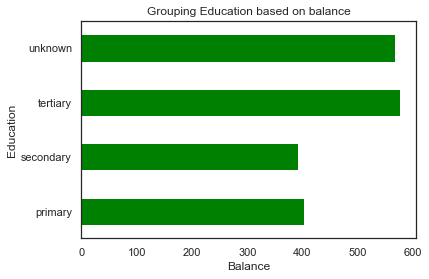

In [10]:
from matplotlib import *
df.groupby('education')['balance'].median().plot.barh(color='green')
plt.ylabel('Balance')
plt.title('Education wise Median of Balance');
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Grouping Education based on balance');

__Tertiary education level has the highest median.__

### Make a box plot for pdays to check for outlier.

C:\Users\Aniket Sawant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aniket Sawant\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


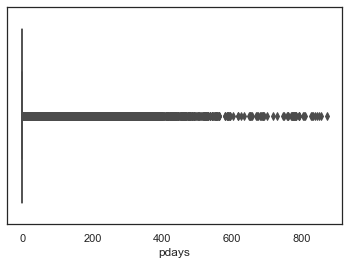

In [11]:
sns.boxplot(df.pdays, orient='v');

__Yes, there are outliers in pdays column.__

In [12]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
# Convert the response variable to a convenient form i.e. int
df.response.replace({'no':0,'yes':1} ,inplace = True)

In [14]:
df.response.dtype

dtype('int64')

In [15]:
df.response.sample(10)

37511    1
11179    0
7421     0
44887    1
43972    1
8054     0
22306    0
26047    0
24313    0
197      0
Name: response, dtype: int64

**Make suitable plots for associations with numerical features and categorical features’**

In [16]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564,0.020012
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
response,0.025155,0.020012,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


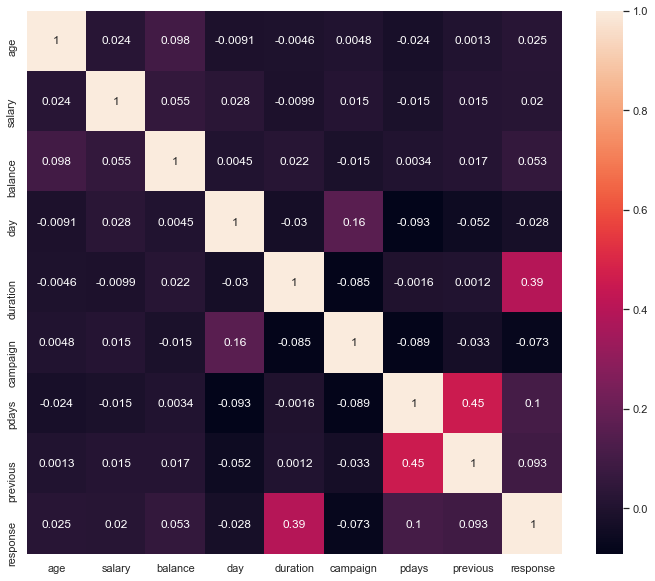

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True);

**The features about the previous campaign data have very less correlation with any of the data.**

C:\Users\Aniket Sawant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


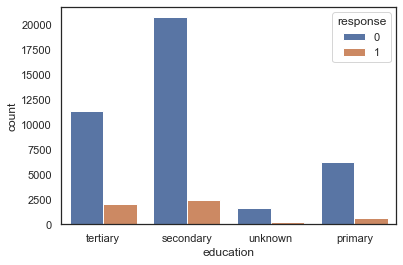

In [18]:
sns.countplot(df['education'],hue=df['response']);

C:\Users\Aniket Sawant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


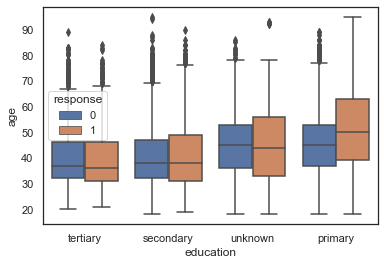

In [19]:
sns.boxplot(df['education'],df['age'],hue=df['response']);

### Are pdays and poutcome associated with the target?

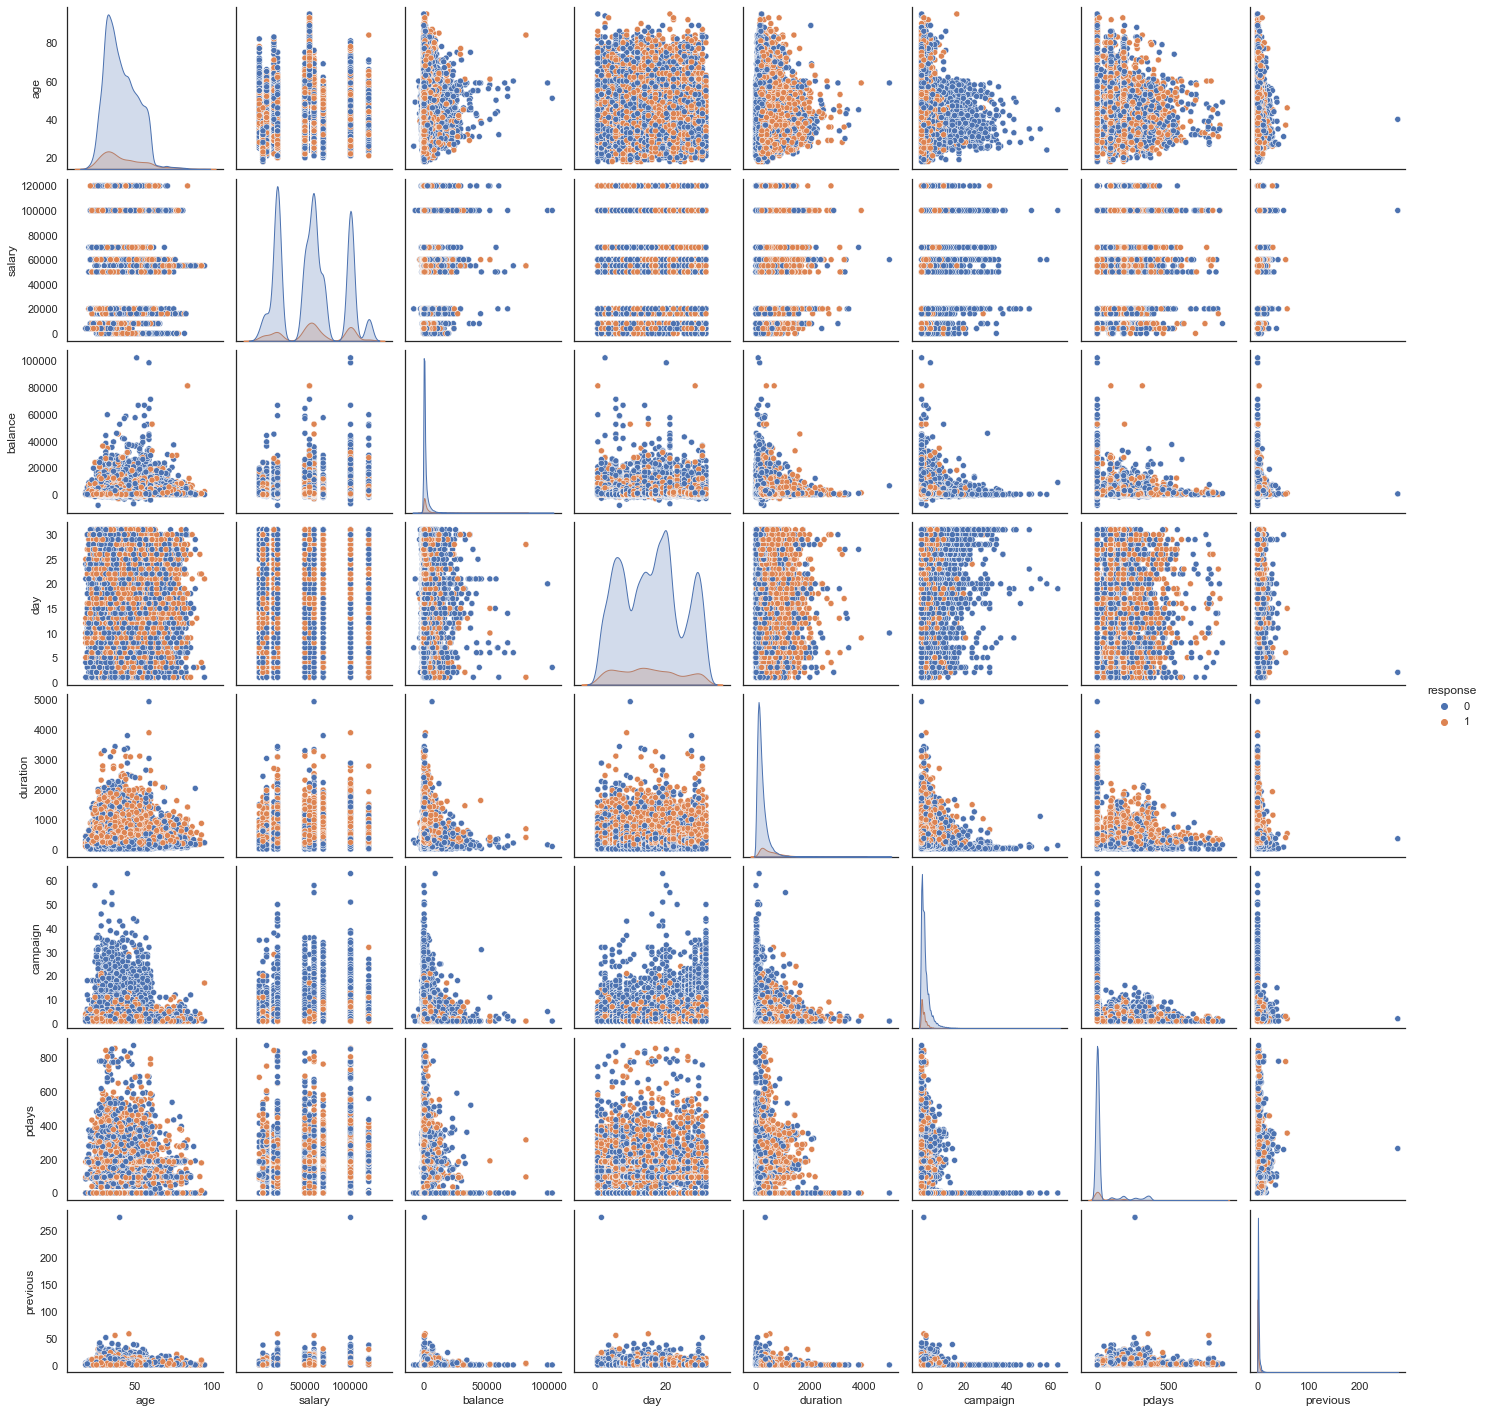

In [20]:
sns.pairplot(df,hue='response');

### Associations of categorical variables

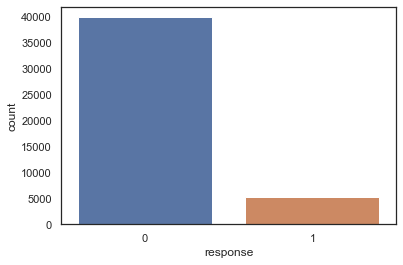

In [21]:
sns.countplot(x='response', data=df);

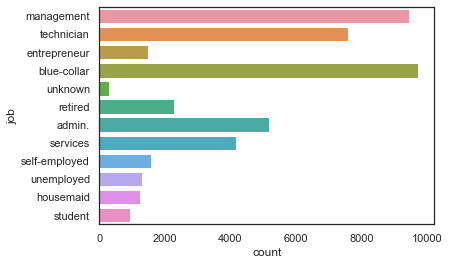

In [22]:
sns.countplot(y='job', data=df);

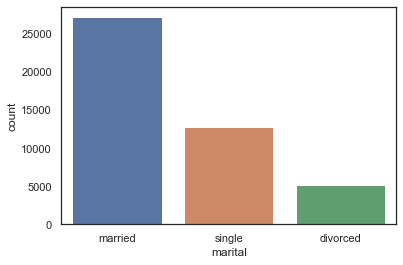

In [23]:
sns.countplot(x='marital', data=df);

<AxesSubplot:xlabel='count', ylabel='education'>

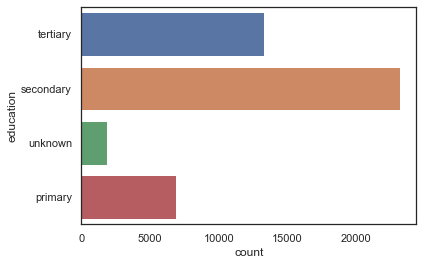

In [24]:
sns.countplot(y='education', data=df)

In [25]:
#  CREATING A LIST FOR ALL CATEGORICAL COLUMNS
categorical_columns = [column for column in df.columns[:-1] if df[column].dtype == "O"] 
print(categorical_columns)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


### Are the features about the previous campaign data useful?

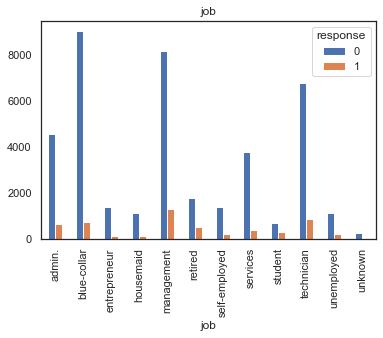

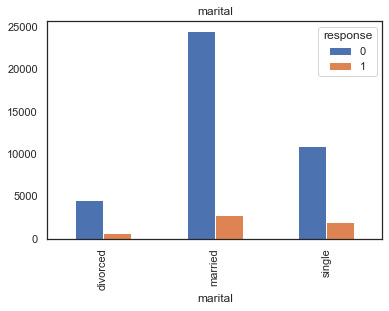

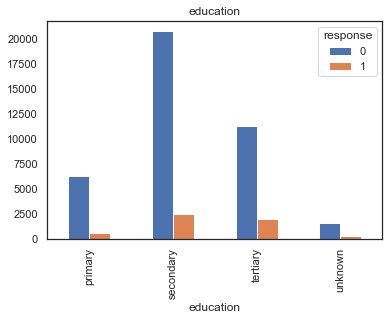

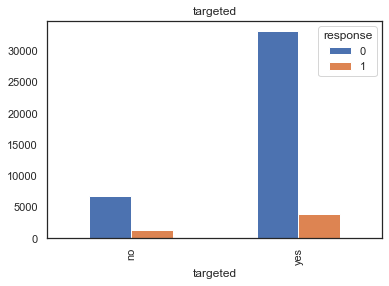

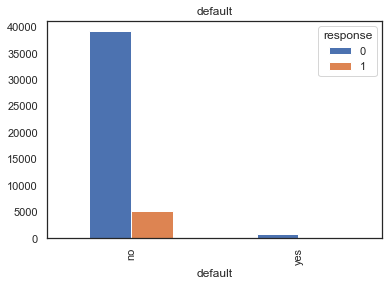

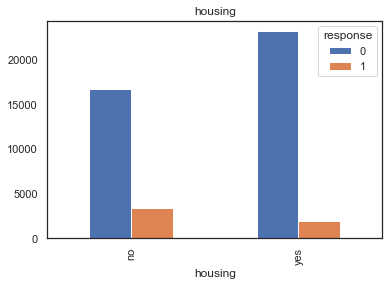

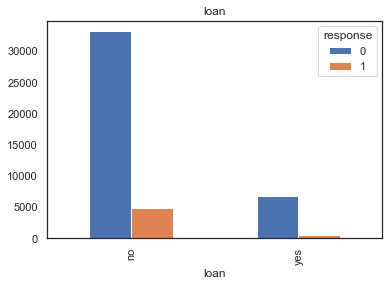

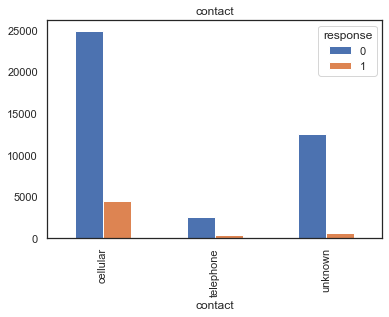

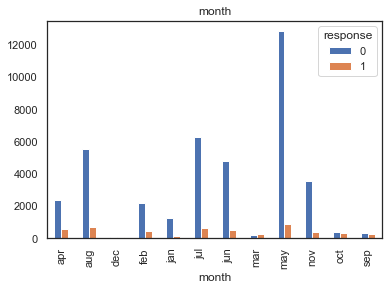

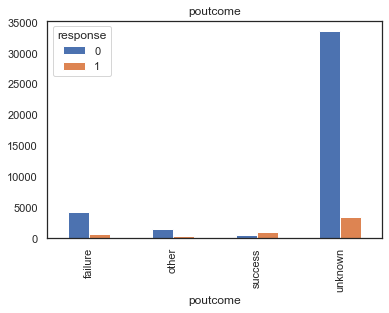

In [26]:
for column in categorical_columns:
    pd.crosstab(df[column],df['response']).plot.bar()
    plt.title(column)

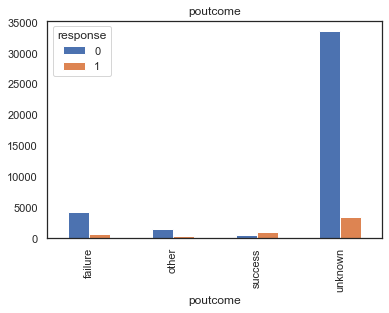

In [27]:
pd.crosstab(df['poutcome'],df['response']).plot.bar()
plt.title('poutcome');

__'poutcome' column is not assosciated with target column because it has more than 80% missing values.__

In [28]:
df.drop('poutcome',axis=1,inplace=True)

In [29]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [30]:
df['previous'].value_counts().head()

0    36954
1     2772
2     2106
3     1142
4      714
Name: previous, dtype: int64

### We need to handle the pdays column with a value of -1 where the previous campaign data is missing

In [32]:
df['pdays_no_contact'] = np.where(df['pdays']==-1,1,0)
df['pdays_no_contact'].value_counts()

1    36954
0     8257
Name: pdays_no_contact, dtype: int64

__We created a new column of users which were not previously contacted.__ 

### Handling Missing Values in Categorical columns

In [34]:
categorical_columns 

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [31]:
for column in categorical_columns[:-1]:
    print(df[column].value_counts(),"\n")

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

yes    37091
no      8120
Name: targeted, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 



__Missing Values are represented as Unknown which is better than to handle missing data by becoming a new category itself rather than imputing it with the mode of the particular column.__

### Handling Outliers in the Data.

In [35]:
# NOW CREATING A LIST OF NUMERICAL COLUMNS:
num_columns = [col for col in df.columns if col not in categorical_columns]
print(num_columns)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response', 'pdays_no_contact']


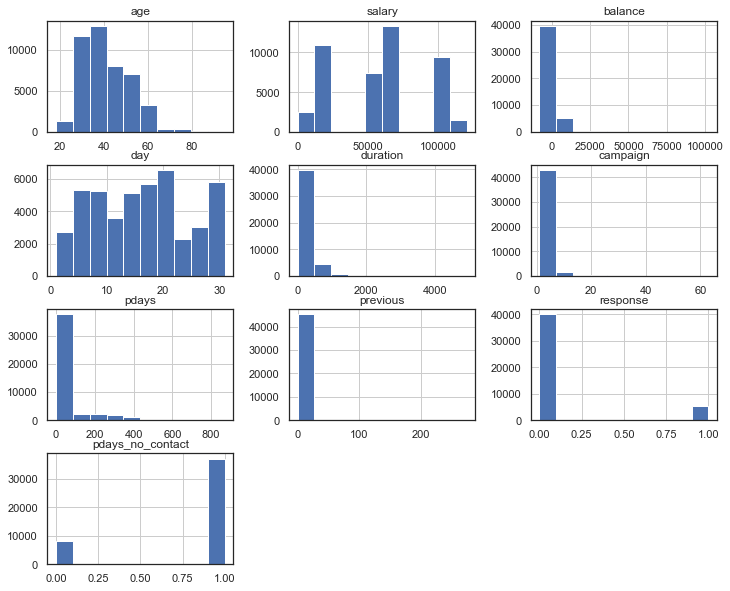

In [36]:
dist=df.hist(figsize=(12,10)) # display numerical feature distribution

In [38]:
# Assuming Age follows A Gaussian / normal, Distribution we will calculate the boundaries which differentiates the outliers
#  USING STD DEVIATION TO FIND THE BOUNDARIES :  MEAN PLUS/MINUS (3 * STD. DEEVIATION)
upper_boundary = df['age'].mean() + 3* df['age'].std()
lower_boundary = df['age'].mean() - 3* df['age'].std()
print(lower_boundary), print(upper_boundary),print(df['age'].mean())

9.079924091402077
72.79249633725466
40.93621021432837


(None, None, None)

In [39]:
index = df[(df['age']>upper_boundary) | (df['age']<lower_boundary)].index
df.drop(index=index,axis=0,inplace=True)

In [40]:
df[(df['age']>upper_boundary) | (df['age']<lower_boundary)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact


In [41]:
# Assuming Balance follows Gaussian/normal Distribution we will calculate the boundaries which differentiates the outliers
# Lets compute the Interquantile range to calculate the boundaries
IQR=df.balance.quantile(0.75)-df.balance.quantile(0.25)

lower_bridge = df['balance'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['balance'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-1940.5
3423.5


In [42]:
df[(df['balance']>upper_bridge) | (df['balance']<lower_bridge)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
34,51,management,100000,married,tertiary,yes,no,10635,yes,no,unknown,5,may,336,1,-1,0,0,1
65,51,management,100000,married,tertiary,yes,no,6530,yes,no,unknown,5,may,91,1,-1,0,0,1
69,35,blue-collar,20000,single,secondary,yes,no,12223,yes,yes,unknown,5,may,177,1,-1,0,0,1
70,57,blue-collar,20000,married,secondary,yes,no,5935,yes,yes,unknown,5,may,258,1,-1,0,0,1
186,40,services,70000,divorced,unknown,no,no,4384,yes,no,unknown,5,may,315,1,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45159,60,services,70000,married,secondary,yes,no,4428,no,no,cellular,9,nov,125,1,96,6,0,0
45164,35,services,70000,married,tertiary,yes,no,4655,no,no,cellular,9,nov,111,2,-1,0,0,1
45181,46,blue-collar,20000,married,secondary,yes,no,6879,no,no,cellular,15,nov,74,2,118,3,0,0
45185,60,services,70000,married,tertiary,yes,no,4256,yes,no,cellular,16,nov,200,1,92,4,1,0


In [43]:
index = df[(df['balance']>upper_bridge) | (df['balance']<lower_bridge)].index
df.drop(index=index,axis=0,inplace=True)

In [44]:
df[(df['balance']>upper_bridge) | (df['balance']<lower_bridge)]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact


In [45]:
df.reset_index(inplace=True)

<AxesSubplot:>

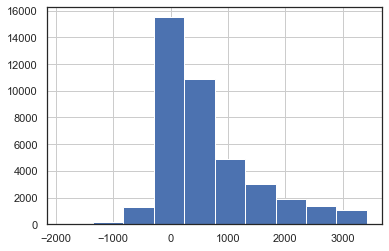

In [46]:
df['balance'].hist()

<AxesSubplot:>

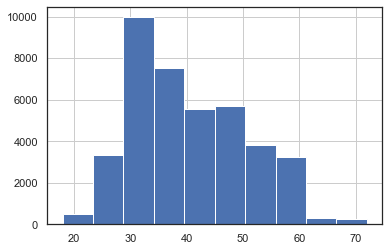

In [47]:
df['age'].hist()

__Outliers are handled now.__

## Handling Categorical columns.

In [48]:
df.head()

,index,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,0,1
1,1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,0,1
2,2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,0,1
3,3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,0,1
4,4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,0,1


In [49]:
df.drop('index',axis=1,inplace=True)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,0,1


In [50]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [51]:
dictionary={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12
}
# CONVERTING THE 'MONTH' COLUMN INTO NUMERICAL VALUE:
df['month']=df['month'].map(dictionary)

In [53]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [54]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,5,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,5,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,5,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,5,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,5,198,1,-1,0,0,1


In [55]:
df1 = df.copy()
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,5,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,5,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,5,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,5,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,5,198,1,-1,0,0,1


In [56]:
df1 = pd.get_dummies(df1,drop_first=True)
df1.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,response,...,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,-1,0,0,...,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,-1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,33,120000,2,5,5,76,1,-1,0,0,...,0,1,0,0,1,0,1,1,0,1
3,47,20000,1506,5,5,92,1,-1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,33,0,1,5,5,198,1,-1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [57]:
df1.shape

(40121, 33)

In [58]:
df1.loc[df1['pdays']==-1,'pdays']=0
df1['pdays'].head()

0    0
1    0
2    0
3    0
4    0
Name: pdays, dtype: int64

### Handling Imbalanced Dataset

Percentage of subsription :  10.926945988385135
Percentage of no subscription :  89.07305401161486


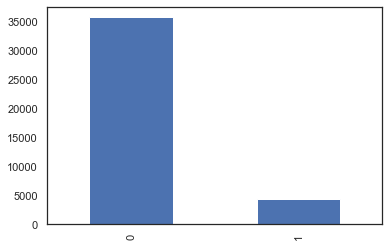

In [59]:
#Check the percentage of 0 to 1
No_sub = len(df[df['response'] == 0])
Sub = len(df[df['response'] == 1])
percent_No_sub = (No_sub/len(df['response'])) * 100
percent_sub = (Sub/len(df['response'])) * 100

print('Percentage of subsription : ',percent_sub)
print('Percentage of no subscription : ', percent_No_sub)


df['response'].value_counts().plot.bar();

In [60]:
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek

In [61]:
X = df1.drop('response',axis=1)
y = df1['response']

In [62]:
from collections import Counter

os=SMOTETomek(1)
X_ns,y_ns = os.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))

C:\Users\Aniket Sawant\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 35737, 1: 4384})
The number of classes after fit Counter({0: 34685, 1: 34685})


In [68]:
y_ns.value_counts()

1    34685
0    34685
Name: response, dtype: int64

In [64]:
y_ns.head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [65]:
X_ns.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,...,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,0,0,1,...,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,0,0,1,...,1,1,0,0,1,0,1,0,0,1
2,33,120000,2,5,5,76,1,0,0,1,...,0,1,0,0,1,0,1,1,0,1
3,47,20000,1506,5,5,92,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,33,0,1,5,5,198,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


## Feature Selection for model development

In [66]:
job = 'job_'+df['job'].unique()

In [67]:
job

array(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired', 'job_admin.',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'], dtype=object)

In [69]:
X_ns.drop(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'],axis=1,inplace=True)

In [70]:
'marital_'+df['marital'].unique()

array(['marital_married', 'marital_single', 'marital_divorced'],
      dtype=object)

In [71]:
X_ns.drop(['marital_married', 'marital_single'],axis=1,inplace=True)

In [72]:
X_ns.drop(['targeted_yes', 'default_yes'],axis=1,inplace=True)

In [73]:
X_ns.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,0,0,1,1,0,0,1,0,0,1
2,33,120000,2,5,5,76,1,0,0,1,1,0,0,1,1,0,1
3,47,20000,1506,5,5,92,1,0,0,1,0,0,1,1,0,0,1
4,33,0,1,5,5,198,1,0,0,1,0,0,1,0,0,0,1


In [74]:
X_ns.shape

(69370, 17)

In [75]:
y_ns.shape

(69370,)

## Feature Scaling

In [76]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [77]:
scaler=StandardScaler()
### fit vs fit_transform
scaler.fit_transform(X_ns)

array([[ 1.75237476,  1.32465878,  1.63791484, ..., -0.33809157,
        -0.19133969,  2.15498657],
       [ 0.39068489,  0.08655567, -0.79378253, ..., -0.33809157,
        -0.19133969,  2.15498657],
       [-0.6792143 ,  1.94371033, -0.82484016, ...,  2.95777859,
        -0.19133969,  2.15498657],
       ...,
       [ 0.48794845,  0.08655567, -0.43144352, ..., -0.33809157,
        -0.19133969, -0.46404001],
       [ 1.16879339,  1.32465878, -0.14042203, ..., -0.33809157,
        -0.19133969, -0.46404001],
       [-0.87374142,  0.08655567, -0.80298479, ..., -0.33809157,
        -0.19133969, -0.46404001]])

In [78]:
X_scaled = pd.DataFrame(scaler.fit_transform(X_ns),columns=X_ns.columns)
X_scaled.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,1.752375,1.324659,1.637915,-1.306731,-0.41282,-0.340760,-0.523942,-0.485257,-0.332398,0.628504,-0.864650,1.678014,-0.159309,1.215270,-0.338092,-0.19134,2.154987
1,0.390685,0.086556,-0.793783,-1.306731,-0.41282,-0.657697,-0.523942,-0.485257,-0.332398,0.628504,1.156538,-0.595943,-0.159309,1.215270,-0.338092,-0.19134,2.154987
2,-0.679214,1.943710,-0.824840,-1.306731,-0.41282,-0.873791,-0.523942,-0.485257,-0.332398,0.628504,1.156538,-0.595943,-0.159309,1.215270,2.957779,-0.19134,2.154987
3,0.682476,-1.151547,0.905185,-1.306731,-0.41282,-0.827691,-0.523942,-0.485257,-0.332398,0.628504,-0.864650,-0.595943,6.277090,1.215270,-0.338092,-0.19134,2.154987
4,-0.679214,-1.770599,-0.825990,-1.306731,-0.41282,-0.522279,-0.523942,-0.485257,-0.332398,0.628504,-0.864650,-0.595943,6.277090,-0.822863,-0.338092,-0.19134,2.154987


## Model Development

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y_ns, test_size=0.3, random_state=0)

In [80]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [82]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[9004 1332]
 [1279 9196]]
0.8745375042045073
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     10336
           1       0.87      0.88      0.88     10475

    accuracy                           0.87     20811
   macro avg       0.87      0.87      0.87     20811
weighted avg       0.87      0.87      0.87     20811



## Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X_scaled,y_ns,cv=15)

score

array([0.79697297, 0.82010811, 0.95091892, 0.92908108, 0.91394595,
       0.89881081, 0.89902703, 0.85232432, 0.89513514, 0.85124324,
       0.70307093, 0.83758651, 0.86094291, 0.88148789, 0.74286332])

In [84]:
score.mean()

0.8555679416440661

## Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[9541  795]
 [ 558 9917]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10336
           1       0.93      0.95      0.94     10475

    accuracy                           0.93     20811
   macro avg       0.94      0.93      0.93     20811
weighted avg       0.94      0.93      0.93     20811

0.9349863053193023


In [86]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,X_scaled,y_ns,cv=15)

score

array([0.75848649, 0.85902703, 0.94789189, 0.9587027 , 0.95783784,
       0.9187027 , 0.93578378, 0.91286486, 0.95437838, 0.89037838,
       0.83542388, 0.65960208, 0.90376298, 0.90527682, 0.67063149])

In [87]:
score.mean()

0.8712500857258642

__Random Forest Performs much better as its average accuracy score is 87.13% to that of Logistic regression which has an accuracy of 85.55%.__

__I have used Accuracy as a metric to compare because I have handled the imbalanced data, would it be imbalanced I should have used F1-score.__